In [1]:
from geoarray import GeoArray
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from isofit.utils import surface_model
from isofit.core.forward import ForwardModel
from isofit.configs.configs import create_new_config
from isofit.inversion.inverse import Inversion
from isofit.core.fileio import IO

In [29]:
import tkinter
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

In [10]:
data = GeoArray('C:\\Users\\vpatro\\Desktop\\ang20160126\\ang20160126t055327_corr_v2m2_img')

In [11]:
# Sample pixel for experiment
avirisng_input = data[200,500,:]
plt.plot(avirisng_input)
plt.ylim([0,0.5])
plt.ylabel('Reflectance')
plt.xlabel('Wavelength Band')

Text(0.5, 0, 'Wavelength Band')

In [16]:
np.savetxt('C:\\Users\\vpatro\\Desktop\\avirisng_input.txt', avirisng_input)

In [20]:
# Surface model
surface_model("C:\\Users\\vpatro\\Desktop\\isofit_vp\\examples\\20171108_Pasadena\\configs\\ang20171108t184227_surface.json")

config = create_new_config("C:\\Users\\vpatro\\Desktop\\isofit_vp\\examples\\20171108_Pasadena\\configs\\ang20171108t184227_beckmanlawn.json")
fm = ForwardModel(config)

x = np.loadtxt("C:\\Users\\vpatro\\Desktop\\avirisng_input.txt")
x = np.append(x,1.75)
x = np.append(x,0.05)

inv = Inversion(config, fm)
io = IO(config, fm)

io.get_components_at_index(0, 0)
geom = io.current_input_data.geom # alternately, call via geom = Geometry()...this won't have data from the above config file
meas = io.current_input_data.meas  # a numpy  array

In [23]:
OE_estimations = [[], [], [], [], []]
for i in range(5):
    radiance_measurement = fm.calc_rdn(x,geom)
    calculated_reflectance = inv.invert(radiance_measurement, geom)[0]
    OE_estimations[i] = calculated_reflectance

OE_estimations = np.array(OE_estimations)

assert(OE_estimations[0,:].all() == OE_estimations[1,:].all())
assert(OE_estimations[0,:].all() == OE_estimations[2,:].all())
assert(OE_estimations[0,:].all() == OE_estimations[3,:].all())
assert(OE_estimations[0,:].all() == OE_estimations[4,:].all())


np.savetxt(r'C:\Users\vpatro\\Desktop\OE_reflectance_estimation.txt', OE_estimations)

(0.0, 1.0)

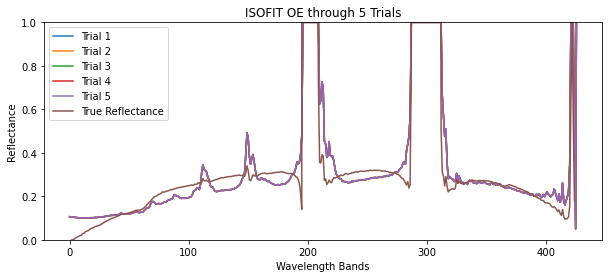

In [32]:
OE_estimated_reflectance = np.loadtxt(r'C:\Users\vpatro\\Desktop\OE_reflectance_estimation.txt')
labels = ['Trial 1', 'Trial 2', 'Trial 3', 'Trial 4', 'Trial 5']
plt.rcParams["figure.figsize"]=(10,4)
for i in range(OE_estimated_reflectance.shape[0]):
    column = OE_estimated_reflectance[i,:]
    plt.plot(column, label = labels[i])
plt.plot(avirisng_input, label = 'True Reflectance')
plt.legend()
plt.ylabel('Reflectance')
plt.xlabel('Wavelength Bands')
plt.title('ISOFIT OE through 5 Trials')
plt.ylim(0,1)


In [33]:
# ISOFIT outputs should be the same
assert(OE_estimated_reflectance[0,:].all() == OE_estimated_reflectance[1,:].all())
assert(OE_estimated_reflectance[0,:].all() == OE_estimated_reflectance[2,:].all())
assert(OE_estimated_reflectance[0,:].all() == OE_estimated_reflectance[3,:].all())
assert(OE_estimated_reflectance[0,:].all() == OE_estimated_reflectance[4,:].all())